# 13-1 : moons 데이터셋을 이용한 AdaBoostClassifier, RandomForestClassifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
X_moon, y_moon = make_moons(n_samples = 500,
                            shuffle = True,
                            noise = 0.25,
                            random_state = 20152410)

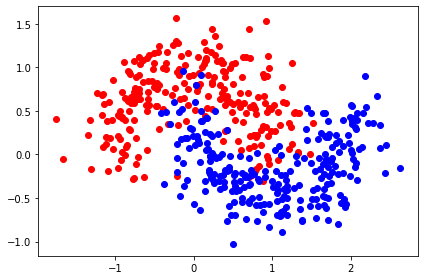

In [3]:
plt.figure(figsize = (6, 4))
plt.plot(X_moon[np.where(y_moon == 0)[0], 0], X_moon[np.where(y_moon == 0)[0], 1], 'ro')
plt.plot(X_moon[np.where(y_moon == 1)[0], 0], X_moon[np.where(y_moon == 1)[0], 1], 'bo')
plt.tight_layout()
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_moon,
                                                    y_moon,
                                                    train_size = 0.8,
                                                    stratify = y_moon,
                                                    random_state = 20152410)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


In [5]:
n_estimators_list = list(range(50, 501, 50))

In [6]:
adaboost_clf_cv_accuracy = [cross_val_score(estimator = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(),
                                                                           n_estimators = number,
                                                                           learning_rate = 0.3),
                                            X = X_train,
                                            y = y_train,
                                            cv = 4,
                                            scoring = make_scorer(accuracy_score)).mean() for number in n_estimators_list]

In [7]:
rf_clf_cv_accuracy = [cross_val_score(estimator = RandomForestClassifier(n_estimators = number),
                                            X = X_train,
                                            y = y_train,
                                            cv = 4,
                                            scoring = make_scorer(accuracy_score)).mean() for number in n_estimators_list]

In [8]:
print("Maximum cv accuracy of adaboost clf : {}".format(np.max(adaboost_clf_cv_accuracy)))
print("n_estimators of maximum cv accuracy : {}".format(n_estimators_list[np.argmax(adaboost_clf_cv_accuracy)]))

Maximum cv accuracy of adaboost clf : 0.8975
n_estimators of maximum cv accuracy : 200


In [9]:
print("Maximum cv accuracy of adaboost clf : {}".format(np.max(rf_clf_cv_accuracy)))
print("n_estimators of maximum cv accuracy : {}".format(n_estimators_list[np.argmax(rf_clf_cv_accuracy)]))

Maximum cv accuracy of adaboost clf : 0.93
n_estimators of maximum cv accuracy : 450


In [10]:
adaboost_clf_best_n_estimators = n_estimators_list[np.argmax(adaboost_clf_cv_accuracy)]
rf_clf_best_n_estimators = n_estimators_list[np.argmax(rf_clf_cv_accuracy)]

adaboost_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(),
                                  n_estimators = adaboost_clf_best_n_estimators,
                                  learning_rate = 0.3,
                                  random_state = 20152410)

rf_clf = RandomForestClassifier(n_estimators = rf_clf_best_n_estimators,
                                random_state = 20152410)

In [11]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [12]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=20152410,
                       verbose=0, warm_start=False)

In [13]:
ada_clf_y_test_pred = adaboost_clf.predict(X_test)
rf_clf_y_test_pred = rf_clf.predict(X_test)

In [14]:
print("AdaBoostClassifier test accuracy : {}".format(accuracy_score(y_test, ada_clf_y_test_pred)))
print("\n")
print(confusion_matrix(y_test, ada_clf_y_test_pred))
print("\n")
print(classification_report(y_test, ada_clf_y_test_pred))

AdaBoostClassifier test accuracy : 0.89


[[45  5]
 [ 6 44]]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [15]:
print("RandomForestClassifier test accuracy : {}".format(accuracy_score(y_test, rf_clf_y_test_pred)))
print("\n")
print(confusion_matrix(y_test, rf_clf_y_test_pred))
print("\n")
print(classification_report(y_test, rf_clf_y_test_pred))

RandomForestClassifier test accuracy : 0.92


[[46  4]
 [ 4 46]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        50
           1       0.92      0.92      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



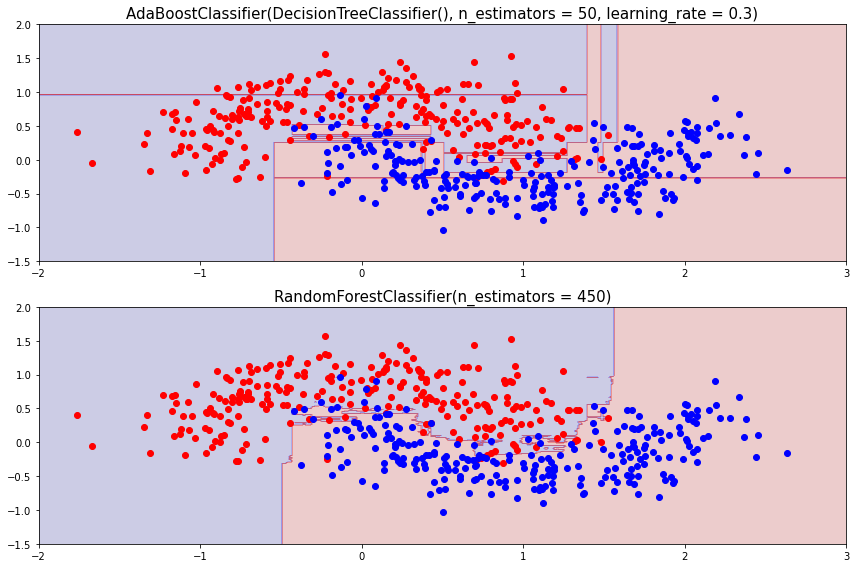

In [16]:
plt.figure(figsize = (12, 8))

plt.subplot(2, 1, 1)
plt.plot(X_moon[np.where(y_moon == 0)[0], 0], X_moon[np.where(y_moon == 0)[0], 1], 'ro')
plt.plot(X_moon[np.where(y_moon == 1)[0], 0], X_moon[np.where(y_moon == 1)[0], 1], 'bo')

x1, x2 = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1.5, 2, 500))
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = adaboost_clf.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred, cmap = 'seismic', alpha = 0.2)

plt.title('AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 50, learning_rate = 0.3)', fontsize = 15)

plt.subplot(2, 1, 2)
plt.plot(X_moon[np.where(y_moon == 0)[0], 0], X_moon[np.where(y_moon == 0)[0], 1], 'ro')
plt.plot(X_moon[np.where(y_moon == 1)[0], 0], X_moon[np.where(y_moon == 1)[0], 1], 'bo')

x1, x2 = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1.5, 2, 500))
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = rf_clf.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred, cmap = 'seismic', alpha = 0.2)

plt.title('RandomForestClassifier(n_estimators = 450)', fontsize = 15)

plt.tight_layout()
plt.show()

# 13-2 : sample data를 이용해 GradientBoostingRegressor 모델 학습

In [17]:
np.random.seed(20152410)
X = np.random.randn(100, 1) - 0.5
y = 4 * X[:, 0]**2 + 0.05 * np.random.randn(100)

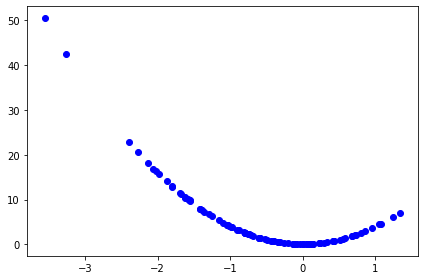

In [18]:
plt.figure(figsize = (6, 4))
plt.plot(X, y, 'bo')
plt.tight_layout()
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 20152410)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80,) (20,)


In [20]:
n_estimators_list = list(range(10, 201, 10))

In [21]:
gbm_reg_cv_accuracy = [cross_val_score(estimator = GradientBoostingRegressor(n_estimators = number,
                                                                             learning_rate = 0.1),
                                            X = X_train,
                                            y = y_train,
                                            cv = 4,
                                            scoring = make_scorer(mean_squared_error)).mean() for number in n_estimators_list]

In [22]:
print("Minimum cv mse of gbm regressor: {}".format(np.min(gbm_reg_cv_accuracy)))
print("n_estimators of minimum cv mse : {}".format(n_estimators_list[np.argmin(gbm_reg_cv_accuracy)]))

Minimum cv mse of gbm regressor: 2.1342133025636265
n_estimators of minimum cv mse : 130


In [23]:
gbm_reg_best_n_estimators = n_estimators_list[np.argmin(gbm_reg_cv_accuracy)]

gbm_reg = GradientBoostingRegressor(n_estimators = gbm_reg_best_n_estimators,
                                    learning_rate = 0.1,
                                    random_state = 20152410)

In [24]:
gbm_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=130,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=20152410, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
gbm_reg_y_pred_test = gbm_reg.predict(X_test)
print("GradientBoostingRegressor test accuracy : {}".format(mean_squared_error(y_test, gbm_reg_y_pred_test)))

GradientBoostingRegressor test accuracy : 0.06138452724919778


# 13-3 : digits 데이터를 이용해 앙상블 모델 학습

In [26]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [27]:
digits_dataset = load_digits()

In [28]:
X = digits_dataset.data
y = digits_dataset.target

In [29]:
X_images = X[0:25].reshape(-1, 8, 8)

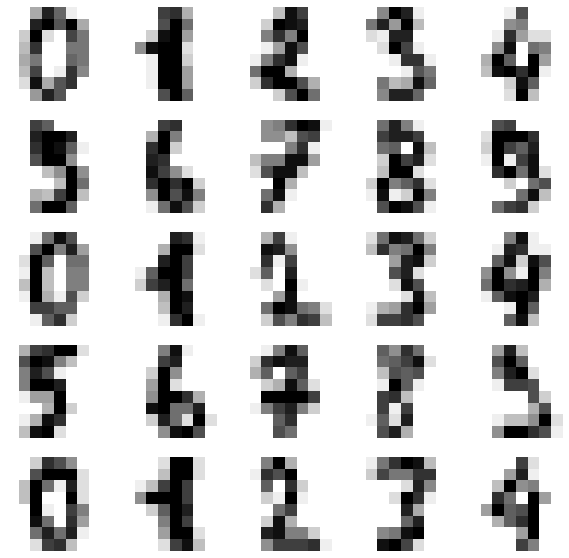

In [30]:
fig, axes = plt.subplots(figsize = (10, 10), nrows = 5, ncols = 5)
axes = axes.ravel()

for index in range(25):
    axes[index].imshow(X_images[index], cmap = plt.cm.binary)
    axes[index].axis('off')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 20152410)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


In [32]:
n_estimators_list = list(range(100, 701, 60))
C_list = np.logspace(-1, 1, 50)

In [33]:
adaboost_clf_cv_accuracy = [cross_val_score(estimator = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(),
                                                                           n_estimators = number,
                                                                           learning_rate = 0.6),
                                            X = X_train,
                                            y = y_train,
                                            cv = 4,
                                            scoring = make_scorer(accuracy_score)).mean() for number in n_estimators_list]

In [34]:
rf_clf_cv_accuracy = [cross_val_score(estimator = RandomForestClassifier(n_estimators = number),
                                      X = X_train,
                                      y = y_train,
                                      cv = 4,
                                      scoring = make_scorer(accuracy_score)).mean() for number in n_estimators_list]

In [35]:
xgb_cv_accuracy = [cross_val_score(estimator = XGBClassifier(n_estimators = number,
                                                             learning_rate = 0.3),
                                   X = X_train,
                                   y = y_train,
                                   cv = 4,
                                   scoring = make_scorer(accuracy_score)).mean() for number in n_estimators_list]

In [36]:
svc_cv_accuracy = [cross_val_score(estimator = SVC(kernel='rbf', C = c),
                                   X = X_train,
                                   y = y_train,
                                   cv = 4,
                                   scoring = make_scorer(accuracy_score)).mean() for c in C_list]

In [37]:
print("Maximum cv accuracy of adaboost clf : {}".format(np.max(adaboost_clf_cv_accuracy)))
print("n_estimators of maximum cv accuracy : {}".format(n_estimators_list[np.argmax(adaboost_clf_cv_accuracy)]))
print('\n')

print("Maximum cv accuracy of random forest clf : {}".format(np.max(rf_clf_cv_accuracy)))
print("n_estimators of maximum cv accuracy : {}".format(n_estimators_list[np.argmax(rf_clf_cv_accuracy)]))
print('\n')

print("Maximum cv accuracy of xgboost clf : {}".format(np.max(xgb_cv_accuracy)))
print("n_estimators of maximum cv accuracy : {}".format(n_estimators_list[np.argmax(xgb_cv_accuracy)]))
print('\n')

print("Maximum cv accuracy of support vector clf : {}".format(np.max(svc_cv_accuracy)))
print("C of maximum cv accuracy : {}".format(C_list[np.argmax(svc_cv_accuracy)]))

Maximum cv accuracy of adaboost clf : 0.8531704580625193
n_estimators of maximum cv accuracy : 700


Maximum cv accuracy of random forest clf : 0.9770446456205509
n_estimators of maximum cv accuracy : 640


Maximum cv accuracy of xgboost clf : 0.959654518724853
n_estimators of maximum cv accuracy : 520


Maximum cv accuracy of support vector clf : 0.9895736614051378
C of maximum cv accuracy : 1.5264179671752334


In [38]:
adaboost_clf_best_n_estimators = n_estimators_list[np.argmax(adaboost_clf_cv_accuracy)]
rf_clf_best_n_estimators = n_estimators_list[np.argmax(rf_clf_cv_accuracy)]
xgb_clf_n_estimators = n_estimators_list[np.argmax(xgb_cv_accuracy)]
svc_best_C = C_list[np.argmax(svc_cv_accuracy)]

In [39]:
adaboost_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(),
                                  n_estimators = adaboost_clf_best_n_estimators,
                                  learning_rate = 0.6,
                                  random_state = 20152410)

rf_clf = RandomForestClassifier(n_estimators = rf_clf_best_n_estimators,
                                random_state = 20152410)

xgb_clf = XGBClassifier(n_estimators = xgb_clf_n_estimators,
                        random_state = 20152410)

svc_clf = SVC(kernel='rbf',
              C = svc_best_C,
              probability = True)

In [40]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [41]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=640,
                       n_jobs=None, oob_score=False, random_state=20152410,
                       verbose=0, warm_start=False)

In [42]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=520, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=20152410,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
svc_clf.fit(X_train, y_train)

SVC(C=1.5264179671752334, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
ada_clf_y_test_pred_target = adaboost_clf.predict(X_test)
rf_clf_y_test_pred_target = rf_clf.predict(X_test)
xgb_clf_y_test_pred_target = xgb_clf.predict(X_test)
svc_clf_y_test_pred_target = svc_clf.predict(X_test)

In [45]:
AdaBoostClassifier
RandomForestClassifier
XGBClassifier
SVC

sklearn.svm._classes.SVC

In [46]:
print("AdaBoostClassifier test accuracy : {}".format(accuracy_score(y_test, ada_clf_y_test_pred_target)))
print("RandomForestClassifier test accuracy : {}".format(accuracy_score(y_test, rf_clf_y_test_pred_target)))
print("XGBClassifier test accuracy : {}".format(accuracy_score(y_test, xgb_clf_y_test_pred_target)))
print("SVC test accuracy : {}".format(accuracy_score(y_test, svc_clf_y_test_pred_target)))

AdaBoostClassifier test accuracy : 0.8194444444444444
RandomForestClassifier test accuracy : 0.9638888888888889
XGBClassifier test accuracy : 0.9722222222222222
SVC test accuracy : 0.9805555555555555


테스트 정확도가 90퍼센트 이하인 AdaBoostClassifier를 제외한 3개의 모델을 이용하여 soft voting 방식의 앙상블 모델 구성

In [47]:
rf_clf_y_test_pred_prob = rf_clf.predict_proba(X_test)
xgb_clf_y_test_pred_prob = xgb_clf.predict_proba(X_test)
svc_clf_y_test_pred_prob = svc_clf.predict_proba(X_test)

ensemble_clf_y_test_pred_prob = (rf_clf_y_test_pred_prob + xgb_clf_y_test_pred_prob + svc_clf_y_test_pred_prob) / 3
ensemble_clf_y_test_pred_target = np.argmax(ensemble_clf_y_test_pred_prob, axis = 1)

In [48]:
print("Ensemble test accuracy : {}".format(accuracy_score(y_test, ensemble_clf_y_test_pred_target)))

Ensemble test accuracy : 0.9805555555555555
